# 🛠️ 0. 초기설정

## 라이브러리

In [ ]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier # StackingClassifier는 sklearn.ensemble에 있음
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

## 한글 설정

In [ ]:
# 한글
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore')

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)

fm.fontManager.addfont(path)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

## 파일마운트

In [ ]:
# 파일 마운트
# 드라이브 마운트 코드
from google.colab import drive

# Restart the runtime before running this cell.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 데이터 프레임 생성

In [ ]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('/content/drive/MyDrive/코드잇/스프린트 미션 제출용/data/bank-additional-full.csv', sep=';')

# 📊 1. 데이터 분석

## 컬럼 정보

| **컬럼명** | **설명** |
| --- | --- |
| **age** | **나이 (숫자)** |
| **job** | **직업 (범주형)** |
| **marital** | **결혼 여부 (범주형)** |
| **education** | **교육 수준 (범주형)** |
| **default** | **신용 불량 여부 (범주형)** |
| **housing** | **주택 대출 여부 (범주형)** |
| **loan** | **개인 대출 여부 (범주형)** |
| **contact** | **연락 유형 (범주형)** |
| **month** | **마지막 연락 월 (범주형)** |
| **day_of_week** | **마지막 연락 요일 (범주형)** |
| **duration** | **마지막 연락 지속 시간, 초 단위 (숫자)** |
| **campaign** | **캠페인 동안 연락 횟수 (숫자)** |
| **pdays** | **이전 캠페인 후 지난 일수 (숫자)** |
| **previous** | **이전 캠페인 동안 연락 횟수 (숫자)** |
| **poutcome** | **이전 캠페인의 결과 (범주형)** |
| **emp.var.rate** | **고용 변동률 (숫자)** |
| **cons.price.idx** | **소비자 물가지수 (숫자)** |
| **cons.conf.idx** | **소비자 신뢰지수 (숫자)** |
| **euribor3m** | **3개월 유리보 금리 (숫자)** |
| **nr.employed** | **고용자 수 (숫자)** |
| **y** | **정기 예금 가입 여부 (이진: yes=1, no=0)** |

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


- duration (마지막 연락 지속 시간, 초 단위 (숫자))
- emp.var.rate (고용 변동률 (숫자))

## 데이터 결측치

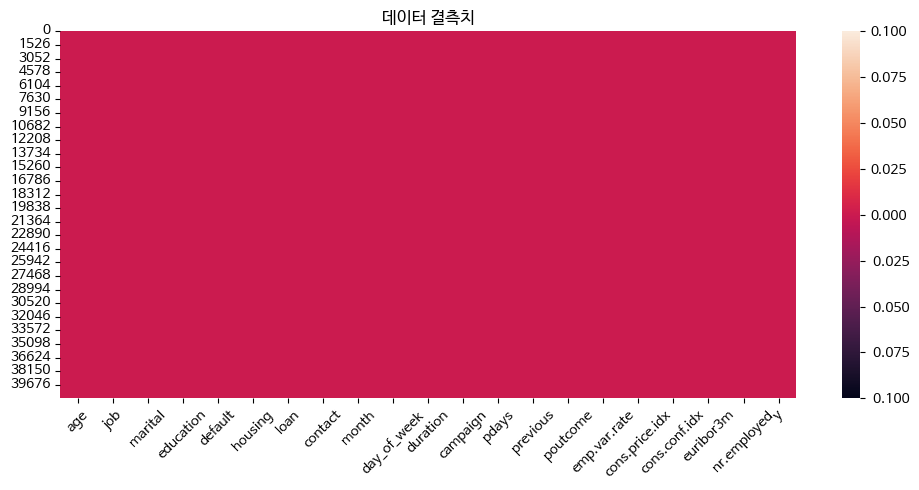

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull())
plt.title("데이터 결측치")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 데이터 연관값

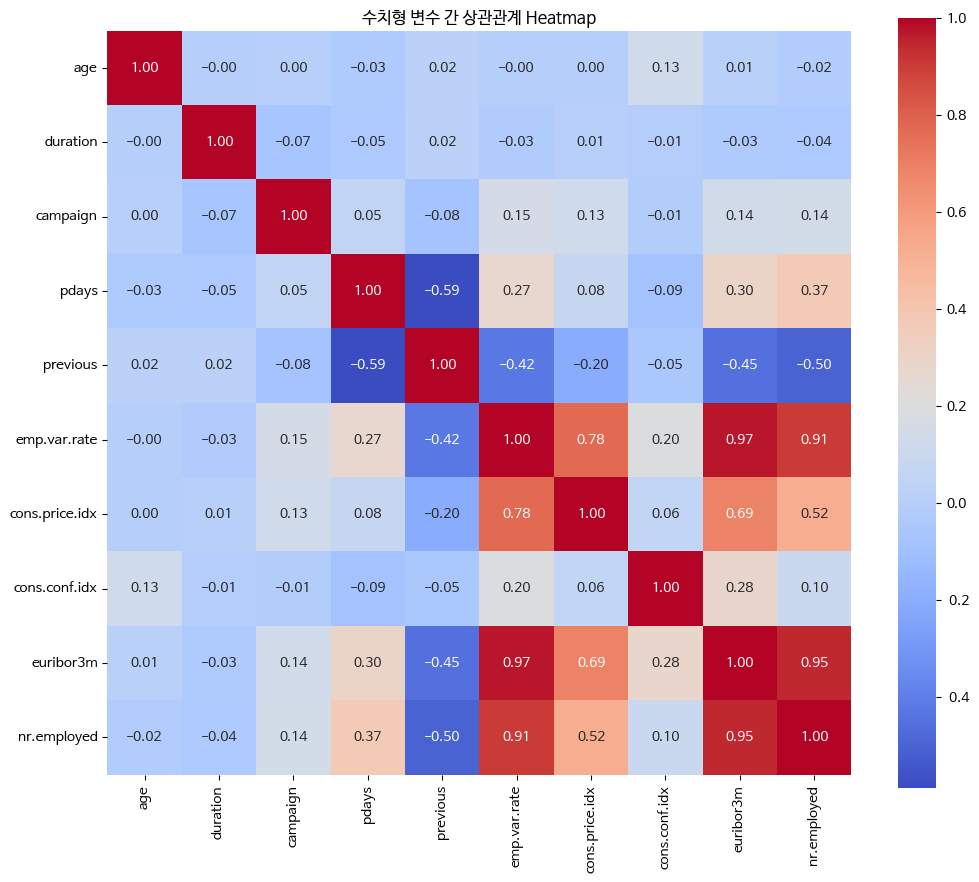

In [ ]:
# 수치형 변수만 선택
numerical_data = df.select_dtypes(include=['int64', 'float64'])

# 상관관계 행렬
corr_matrix = numerical_data.corr()

# 히트맵 시각화
plt.figure(figsize=(12, 10))

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True
)

plt.title("수치형 변수 간 상관관계 Heatmap")
plt.show()

## 이상치 처리

In [ ]:
# 수치형 컬럼만 선택
numerical_cols = numerical_data.columns

,proportion
y,
0,0.887346
1,0.112654


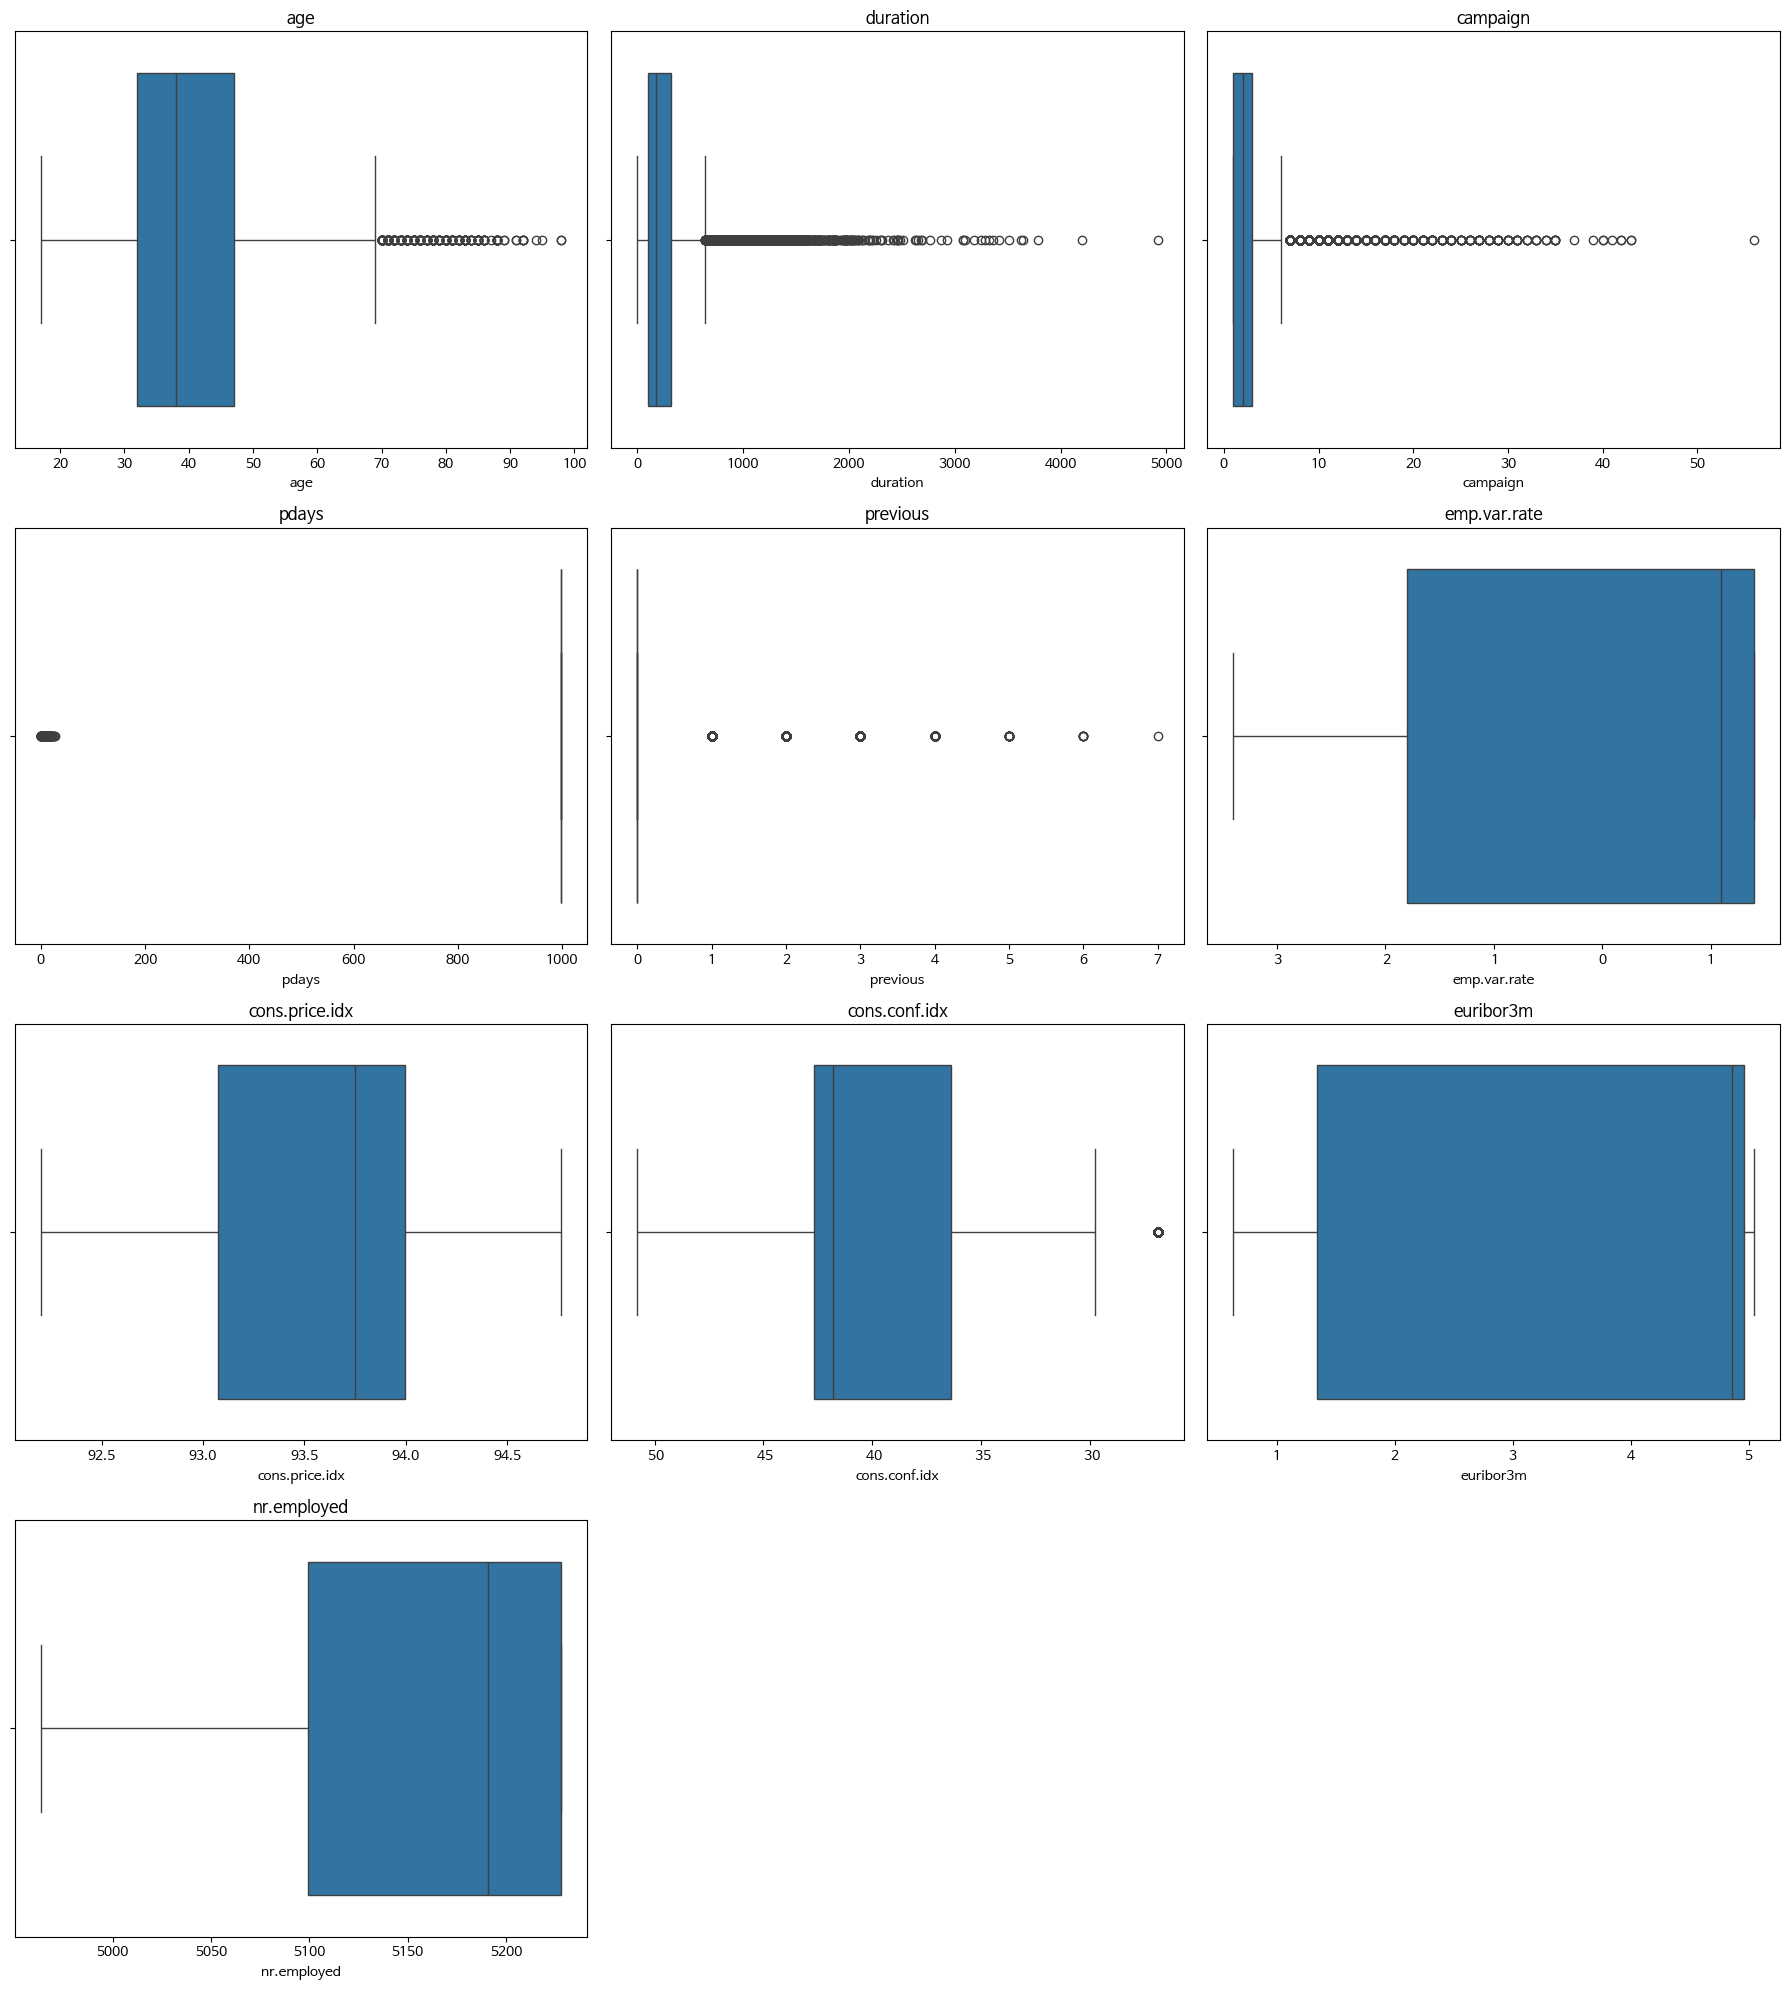

In [ ]:
import math

num_cols = len(numerical_cols)
cols_per_row = 3
rows = math.ceil(num_cols / cols_per_row)

plt.figure(figsize=(18, 5 * rows))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(
        rows,
        cols_per_row,
        i
    )
    sns.boxplot(data=df, x=col)
    plt.title(col)

plt.tight_layout()
plt.show()

### 1. 나이(age) 이상치 처리
- 18세 미만 100세 이상 삭제
- 상한 99%, 하한 1% 절단

In [ ]:
q_low = df['age'].quantile(0.01)
q_high = df['age'].quantile(0.99)
df = df[(df['age'] >= q_low) & (df['age'] <= q_high)]

### 2. 마지막 통화 시간(duration) 이상치 처리
- 예측시 존재하지 않는 데이터이므로 삭제

In [ ]:
df.drop(columns='duration', inplace=True)

### 3. 이번 캠페인 동안의 연락 횟수 (campaign) 이상치 처리
- 상위 99% 제거

In [ ]:
q99 = df['campaign'].quantile(0.99)
df = df[df['campaign'] <= q99]

### 4. 이전 캠페인 후 지난 일수 (pdays) 이상치 처리
- 999 -> 연락한적 없음
- 999보다 작은 수 -> ```contacted_before``` = True / 999는 False 로 변환

In [ ]:
df[df['pdays'] < 999]['pdays']

,pdays
24108,6
24264,4
24279,4
24397,3
24482,4
...,...
41163,4
41164,10
41174,1
41178,6


In [ ]:
df['contacted_before'] = df['pdays'] != 999
df.drop(columns='pdays', inplace=True)

In [ ]:
df['contacted_before']

,contacted_before
0,False
1,False
2,False
3,False
4,False
...,...
41181,False
41182,True
41184,False
41185,False


### 5. 과거 캠페인에서의 연락 횟수 (previous) 이상치 처리
- 상위 99% 제거

In [ ]:
q99 = df['previous'].quantile(0.99)
df = df[df['previous'] <= q99]

### 6. 소비자 신뢰 지수 (cons.conf.idx) 이상치 처리

In [ ]:
df['cons.conf.idx'].describe()

,cons.conf.idx
count,39763.000000
mean,-40.542343
std,4.566711
min,-50.800000
25%,-42.700000
50%,-41.800000
75%,-36.400000
max,-26.900000


In [ ]:
Q1 = df['cons.conf.idx'].quantile(0.25)
Q3 = df['cons.conf.idx'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[(df['cons.conf.idx'] >= lower) & (df['cons.conf.idx'] <= upper)]

### 이상치 처리 후 시각화

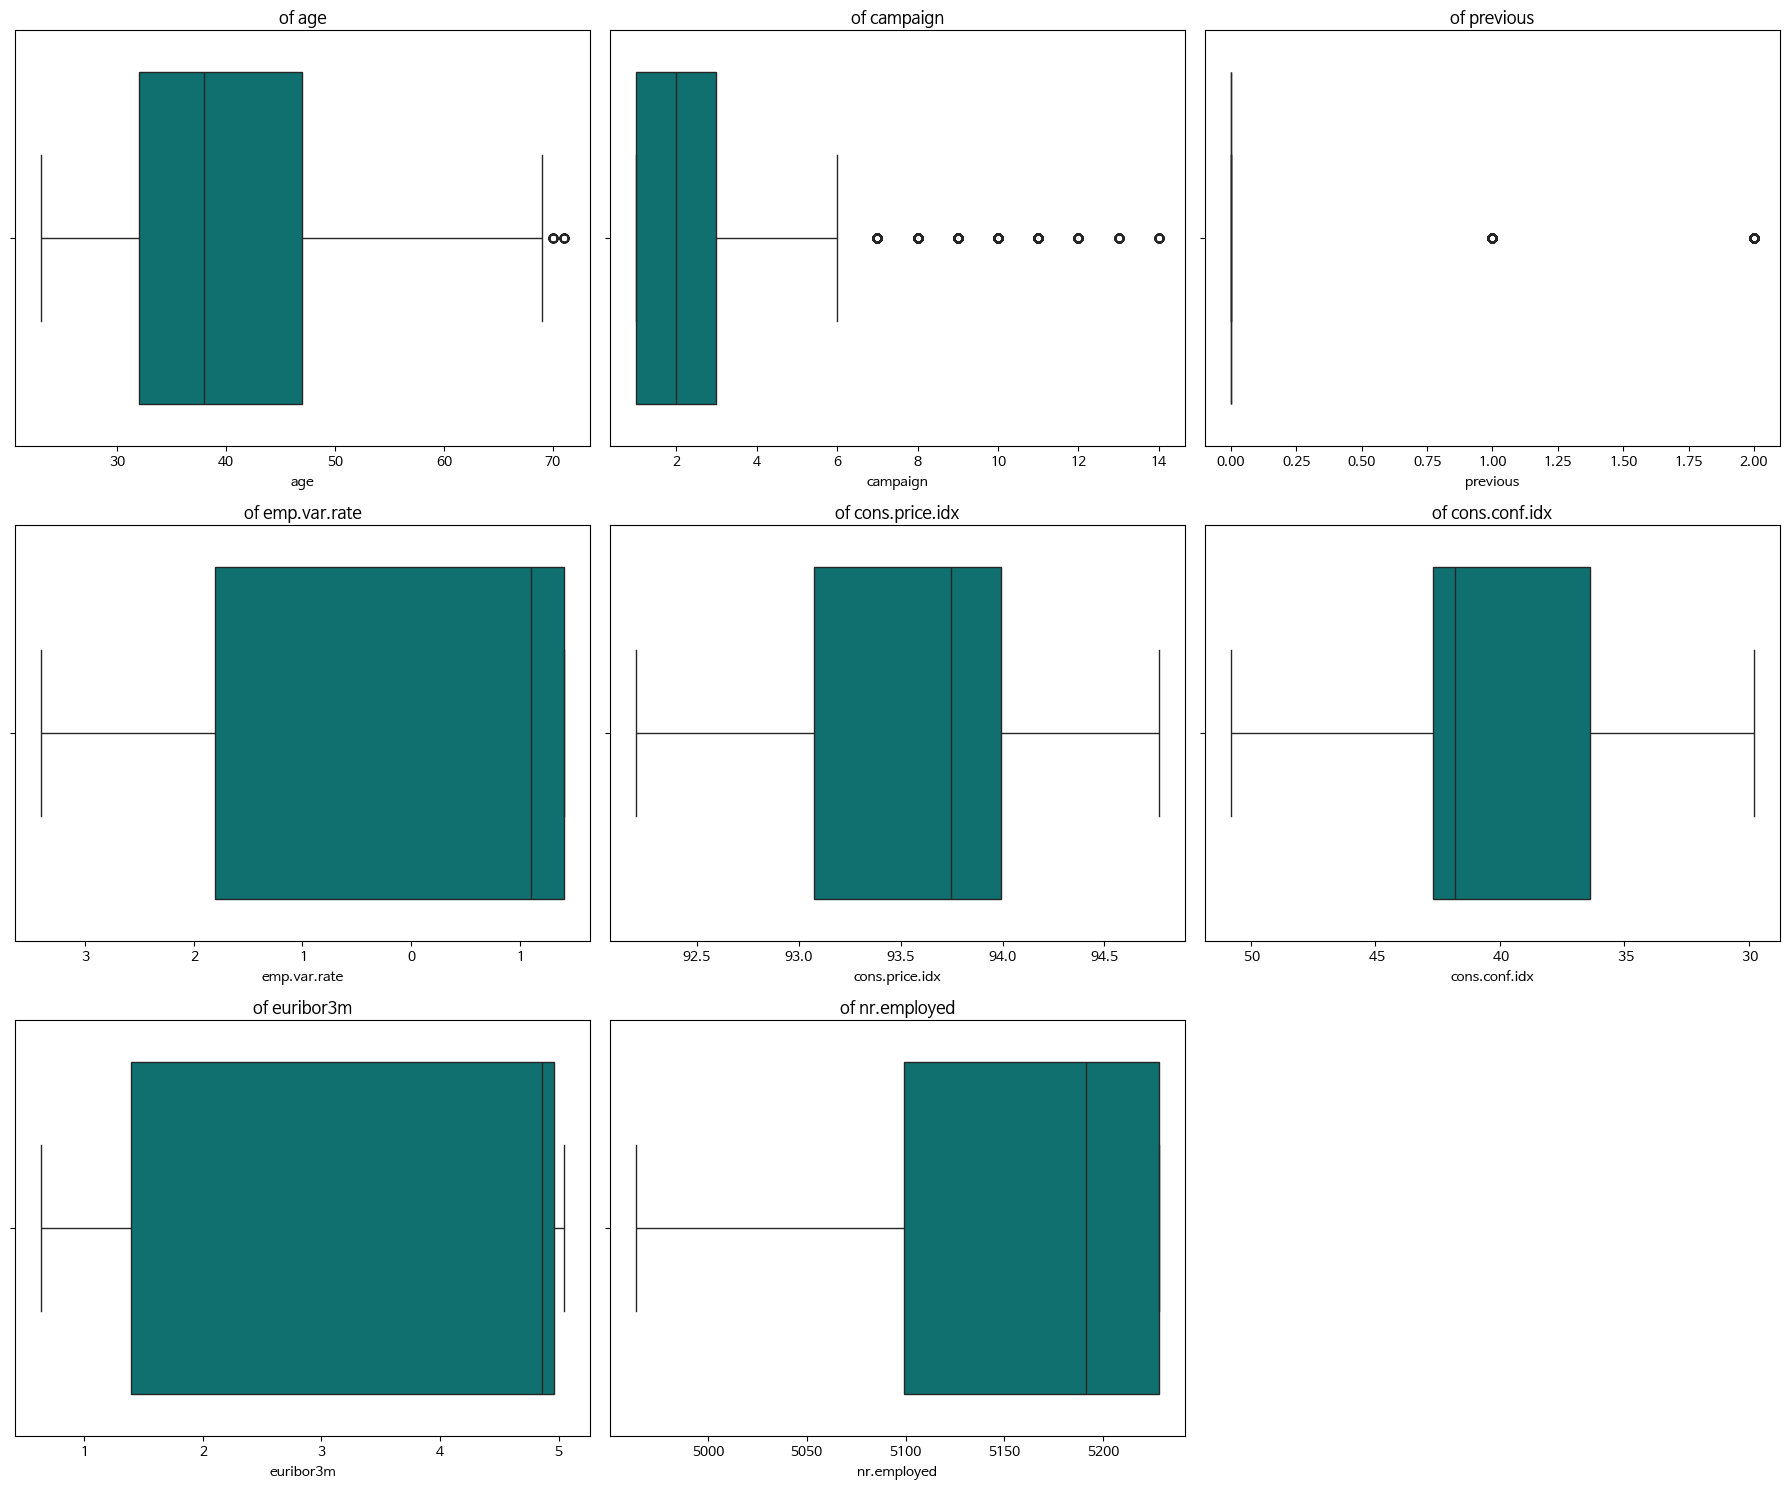

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

numerical_cols = [col for col in numerical_cols if col not in ['y', 'contacted_before']]

cols_per_row = 3
num_cols = len(numerical_cols)
rows = math.ceil(num_cols / cols_per_row)

plt.figure(figsize=(18, 5 * rows))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.boxplot(data=df, x=col, color="teal")
    plt.title(f'of {col}')

plt.tight_layout()
plt.show()

In [ ]:
df.head()

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,contacted_before
0,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False
1,57,1,0,1.1,93.994,-36.4,4.857,5191.0,0,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False
2,37,1,0,1.1,93.994,-36.4,4.857,5191.0,0,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False
3,40,1,0,1.1,93.994,-36.4,4.857,5191.0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False
4,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False


## 예시 분석 질문

**어떤 방향으로 분석해야 할지 고민되신다면, 예시 질문들을 바탕으로 다양한 관점에서 데이터를 탐색하고 분석해보세요.**

- 특정 직업군에서 정기 예금 가입률이 높은가요?

- 교육 수준에 따라 정기 예금 가입률이 달라지나요?

- 과거 마케팅 캠페인의 성공 여부가 현재 캠페인의 성공에 영향을 미치나요?

- 월별 정기 예금 가입률의 차이는 무엇인가요?

- 고객의 나이와 정기 예금 가입 여부 간의 관계는 무엇인가요?

- 정기 예금 가입을 예측하기 위해 사용할 수 있는 가장 중요한 변수는 무엇인가요?

## 분석 1. 특정 직업군에서 정기 예금 가입률이 높은가요?

In [ ]:
# # 각 직업별 가입률 계산
# job_conversion = df.groupby('job')['y'].value_counts(normalize=True).unstack()

# # 비율로 출력되므로 yes 컬럼만 추출
# job_yes_rate = job_conversion['yes'].sort_values(ascending=False)

# One-Hot 인코딩된 직업 컬럼 목록 가져오기
job_columns = [col for col in df.columns if col.startswith('job_')]
print(job_columns)

job_rates = {}
# 각 직업별 가입률 계산
for job_col in job_columns:
    job_name = job_col.replace('job_', '')
    subset = df[df[job_col] == 1] # 위에서 해당 직업 값을 1로 바꿔서
    rate = subset['y'].value_counts(normalize=True)
    job_rates[job_name] = rate.get(1, 0)  # 가입률 (y==1)


['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown']
       age  campaign  previous  emp.var.rate  cons.price.idx  cons.conf.idx  \
29      55         1         0           1.1          93.994          -36.4   
35      55         1         0           1.1          93.994          -36.4   
73      57         1         0           1.1          93.994          -36.4   
91      57         1         0           1.1          93.994          -36.4   
144     38         1         0           1.1          93.994          -36.4   
...    ...       ...       ...           ...             ...            ...   
40244   42         1         2          -1.7          94.215          -40.3   
40370   59         1         1          -1.7          94.027          -38.3   
40428   64         4         0          -1.7          94.027          -38.3   
406

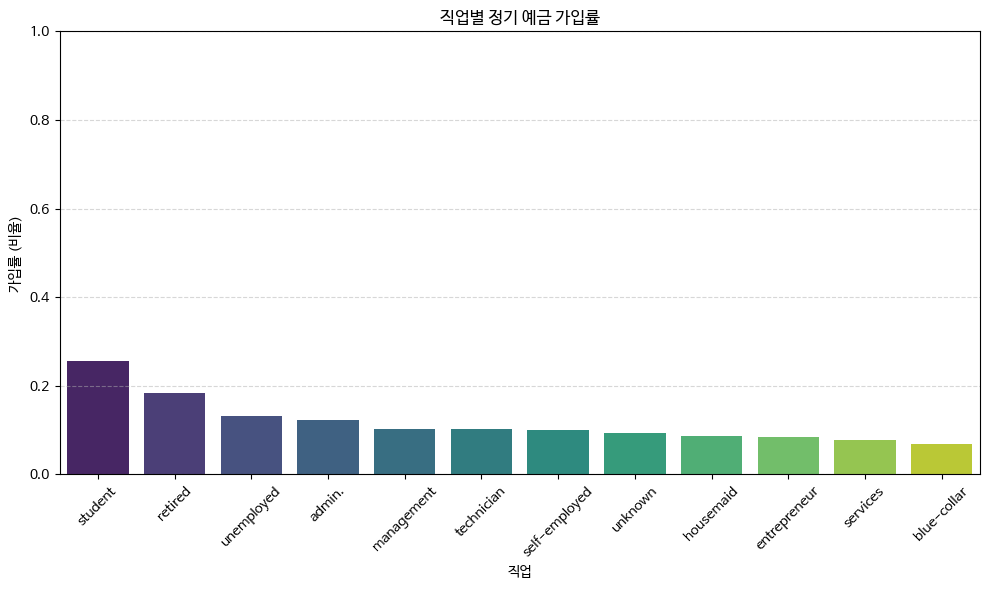

In [ ]:
# # 시각화
# plt.figure(figsize=(10, 6))
# sns.barplot(x=job_yes_rate.values, y=job_yes_rate.index, palette='viridis')

# plt.title('직업별 정기 예금 가입률 (가입: yes 비율)')
# plt.xlabel('가입률')
# plt.ylabel('직업')
# plt.xlim(0, 1)
# plt.grid(True, axis='x', linestyle='--', alpha=0.5)
# plt.tight_layout()
# plt.show()
# 데이터프레임으로 변환
job_rate_df = pd.DataFrame.from_dict(job_rates, orient='index', columns=['가입률'])
job_rate_df = job_rate_df.sort_values(by='가입률', ascending=False)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=job_rate_df.index, y='가입률', data=job_rate_df, palette='viridis')
plt.xticks(rotation=45)
plt.title('직업별 정기 예금 가입률')
plt.ylabel('가입률 (비율)')
plt.xlabel('직업')
plt.ylim(0, 1)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## 교육 수준에 따라 정기 예금 가입률이 달라지나요?

In [ ]:
# 각 교육 수준별 가입률 계산
education_conversion = df.groupby('education')['y'].value_counts(normalize=True).unstack()

# 비율로 출력되므로 yes 컬럼만 추출
education_yes_rate = education_conversion['yes'].sort_values(ascending=False)

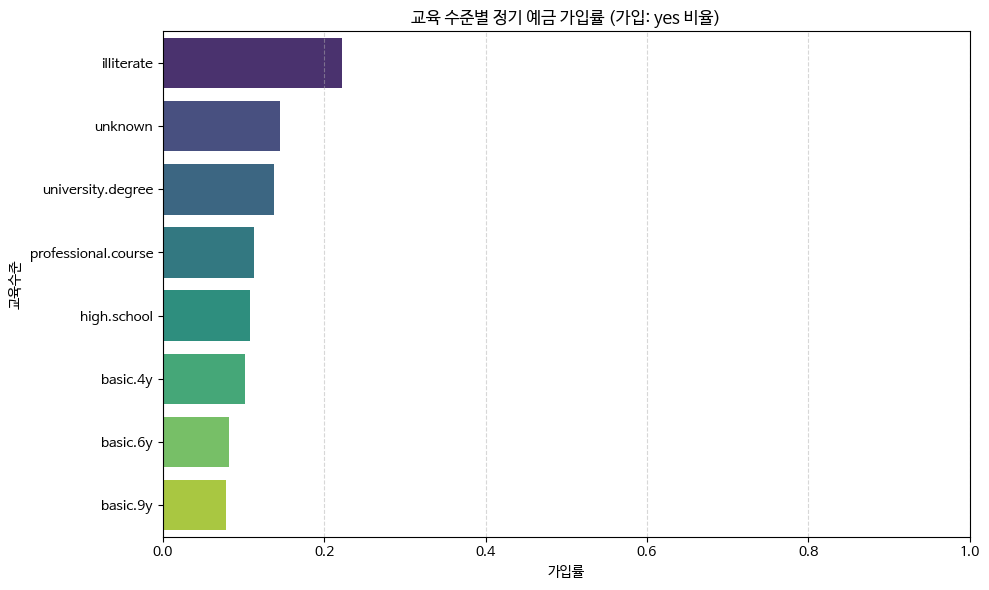

In [ ]:
# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=education_yes_rate.values, y=education_yes_rate.index, palette='viridis')

plt.title('교육 수준별 정기 예금 가입률 (가입: yes 비율)')
plt.xlabel('가입률')
plt.ylabel('교육수준')
plt.xlim(0, 1)
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


- illiterate: 읽고 쓸줄 모르는

- university.degree: 대졸

- professional.course: 전문과정

## 범주형 데이터 변환

In [ ]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [ ]:
cat_cols = df.select_dtypes('object').columns
print(cat_cols)
df = pd.get_dummies(df, columns=cat_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 64 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  y                              41188 non-null  int64  
 11  job_admin.                     41188 non-null  bool   
 12  job_blue-collar                41188 non-null 

In [ ]:
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False


In [ ]:
# 모델별 정확도 저장
accuracies = {}

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df.drop(columns=['y'])
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 보팅
lr_clf = LogisticRegression()
dt_clf = DecisionTreeClassifier(max_depth=5)
svc_clf = SVC(probability=True)

voting_clf = VotingClassifier(
    estimators=[
        ('lr', lr_clf),
        ('dt', dt_clf),
        ('svc', svc_clf)
    ],
    voting='soft',
    weights=[1, 1, 1],
    n_jobs=-1
)

voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
accuracies['Voting'] = accuracy_voting
print("소프트 보팅 분류기 정확도: ", accuracy_voting)

소프트 보팅 분류기 정확도:  0.9056809905316825


In [ ]:
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    max_samples=0.8,
    bootstrap=True,
    n_jobs=-1
)

bagging_clf.fit(X_train, y_train)
bagging_pred = bagging_clf.predict(X_test)
print("Bagging 정확도:", accuracy_score(y_test, bagging_pred))


Bagging 정확도: 0.9079873755765963


In [ ]:
gb_clf = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
print("Gradient Boosting 정확도:", accuracy_score(y_test, gb_pred))

Gradient Boosting 정확도: 0.9189123573682932


In [ ]:
from sklearn.ensemble import StackingClassifier

base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42))
]
final_model = LogisticRegression()

stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=final_model
)

stacking_clf.fit(X_train, y_train)
stacking_pred = stacking_clf.predict(X_test)
print("Stacking 정확도:", accuracy_score(y_test, stacking_pred))

Stacking 정확도: 0.9168487496965283
